# <center><font size=10, color="#7B242F"><u> Ensemble Learning Algorithms</u> </font>

# Introduction

  - **The Wisdom of the crowd**: Asking many people a question, collecting the answers, and finally extract an answer from all the answers. This final answer most probably will be better than an expert's answer alone. This idea can be applied to machine learning algorithms; so, if we train many algorithms then combine their predictions, **wouldn't the final prediction be better?**. Yes, It would. This technique is called **ensemble** in ML.
  
## Terminology: 

  - **An ensemble**: is a group of predictors (regressors or classifiers)
  - **Ensemble Learning**: is the process of combining a set of predictors to produce a better prediction.
  - **Ensemble method**: is an ensemble learning algorithm.  

## Ensemble Learning Method: 

- **Ensemble Learning method** is supervised machine learning technique.

-  **Ensemble Learning methods** use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. 

- **Ensemble learning** can be summarized as follows: 
    - As a first step, different models are trained on the same dataset. 
    - Each model makes its own predictions. 
    - A **meta-model**  aggregates the predictions of individual models and outputs a final prediction. 
    - The final prediction is more robust and less prone to errors than each individual model.
    - The best results are obtained when the models are skillful but in different ways, meaning that if some models make predictions that are way off, the other models should compensate these errors. In such case, the meta-model's predictions are more robust.

### Ensemble Learning: A Visual Explanation:

- Let's take a look at the diagram below to visually understand how ensemble learning works for a classification problem. 
    - First, the training set is fed to different classifiers.
    - Each classifier learns its parameters and makes predictions. 
    - These predictions are fed to a meta model.
    - The meta model aggregates the predictions.
    - Finaly, the meta model outputs a final prediction.

## Ensemble Learning Diagram

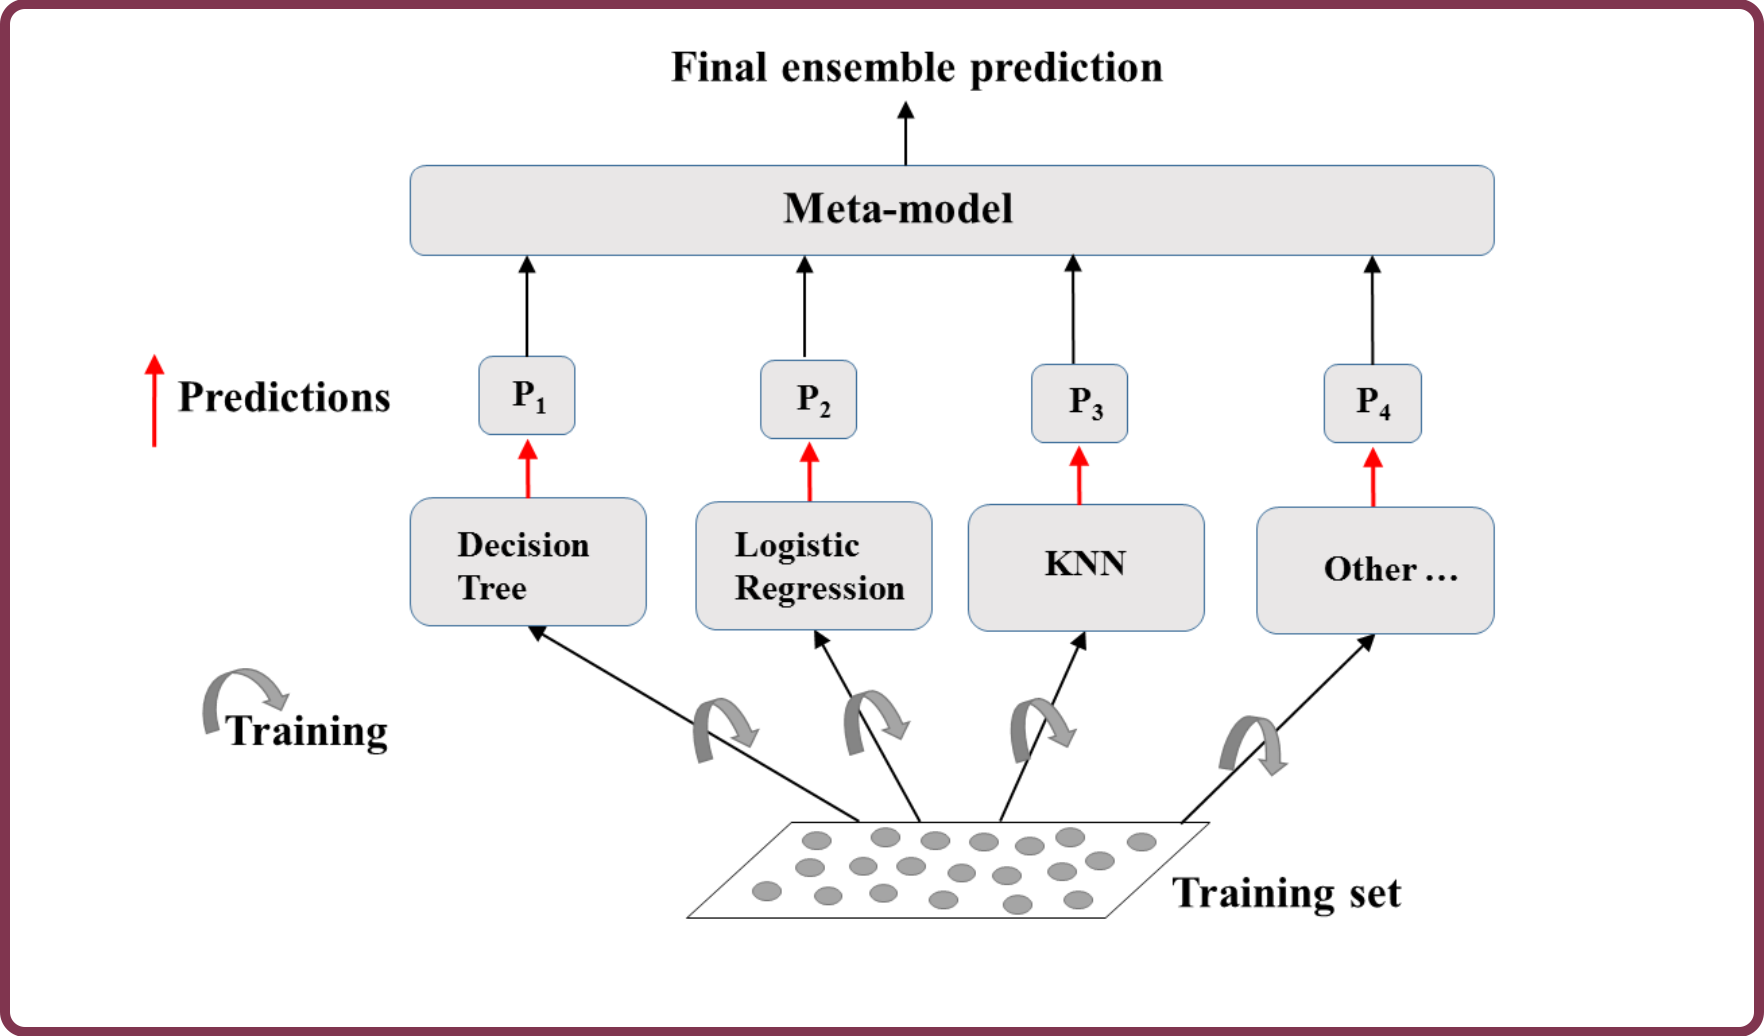

## Voting Classifiers: 

 - In real world machine learning projects, you will train different classifiers such as **logistic regression, KNN-classifier, decision tree, SVM classifier ...ect** on the same dataset. Each one of these is called a **voting classifier**. 
 
 
 - These built classifier should have been already build carefully and fined-tuned to produce good predictions.
 
 - Aiming to achieve even better predictions involves combining all these good classifiers predictions to generate the best predictions you can achieve.
 
 - The predictions of classifiers are aggregated then class that gets the most votes is the one predicted. This is a simple technique called **majority voting or hard voting** 
 
 - **Voting classifier** often achieves a higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner, the ensemble can still be a strong learner provided there are a sufficient number of weak learners and they are sufficiently diverse.
 
### Example of Voting Classifier:

 - Consider the diagram below, where a binary classification task is conducted. 
 
 - Train **N** classifiers on train dataset.
 
 - The ensemble consists of these **N** classifiers making the predictions **$P_0$,$P_1$, $\ldots$ $P_N$** with $P =0\ \text{or} P=1$.
 
 - The meta model outputs the final prediction by **majority voting**.

### Example of Voting Classifier:

In [1]:
from IPython.display import Image

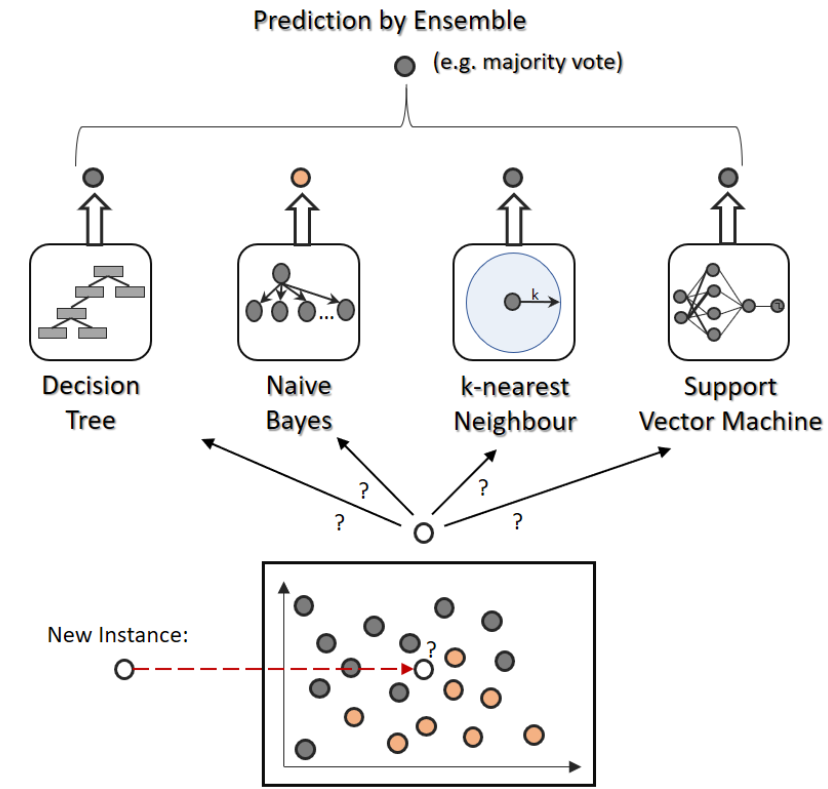

In [2]:
Image('ensemble_learning2.png', width = 500)

## Hard Voting (Majoritiy Voting)

  - **Hard Voting** is also called **majority voting**. This is what we called **meta model** in the diagram above. 
  
  - **Hard voting** depends a very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the **most votes**.
 
### Example of Hard Voting:

  - Suppose you have trained three classifiers that make the ensemble as shown in the diagram below.
  
  - The classifiers 1 and 3 predict the label of 1 for a new data-point, but classifier 2 predicts the label 0. 
  
  - In this case, 1 has 2 votes while 0 has 1 vote. As a result, the **voting classifier** predicts **1**.
  


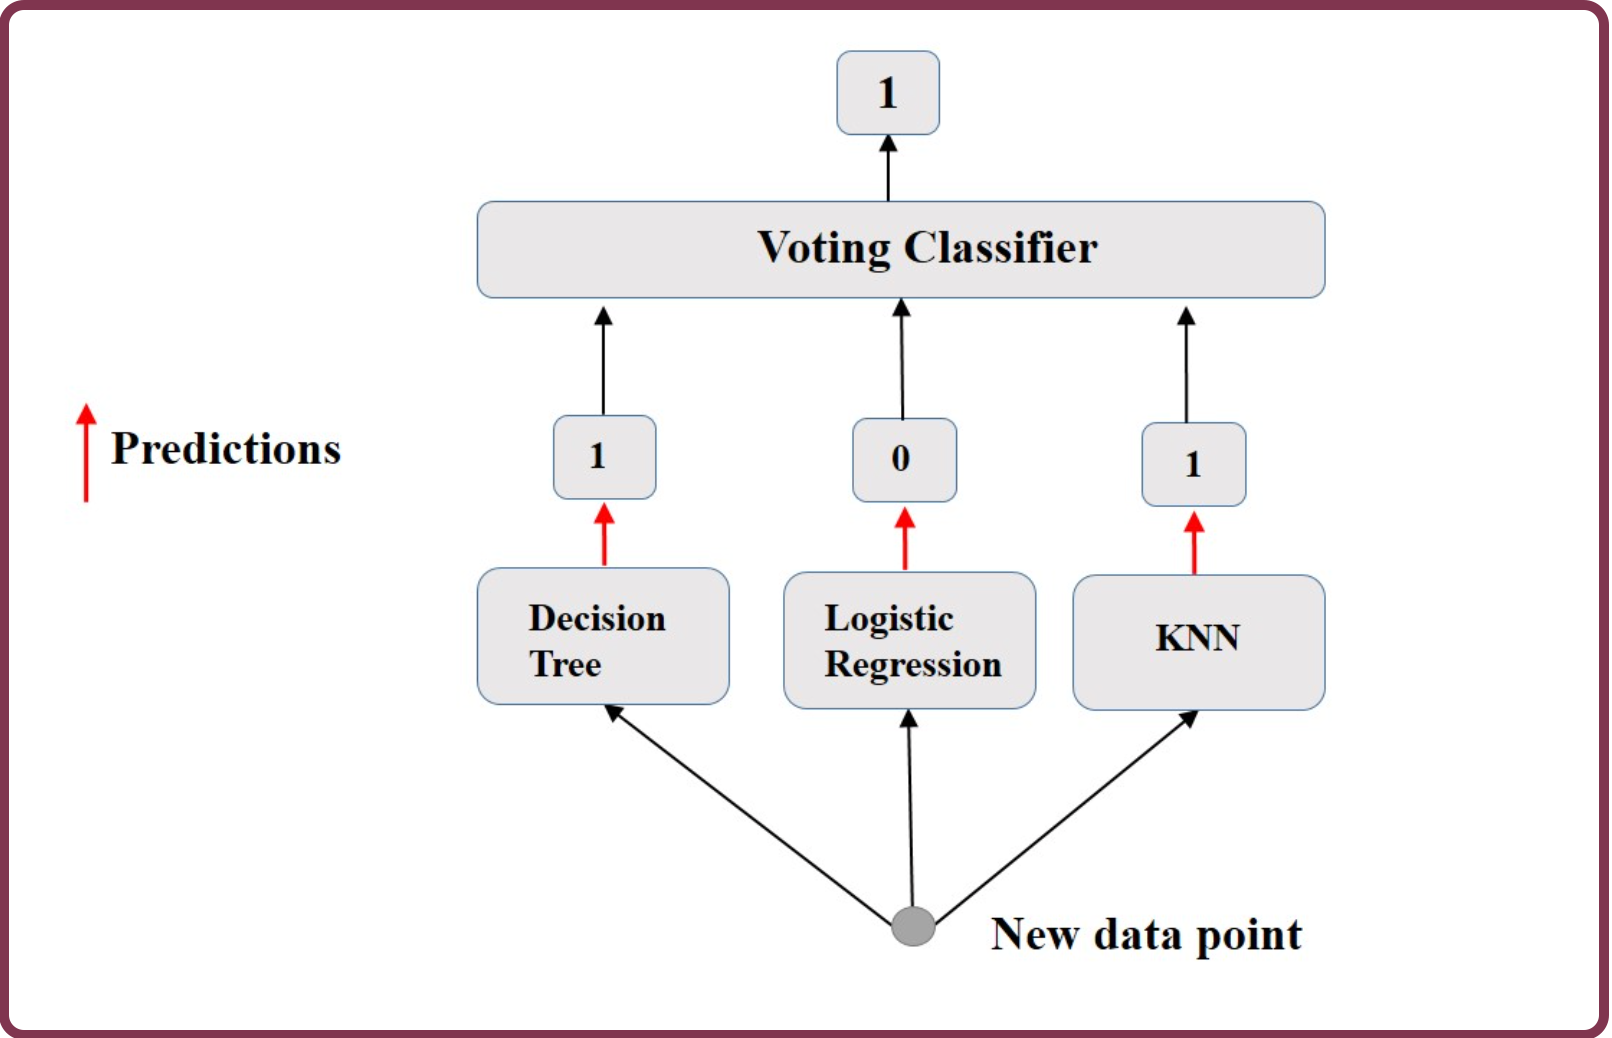

### <center> <font size=6, color="#7F942F"><u>  Ensemble Models in Scikit-Learn 

When I start learning a new thing, reading a book for example. The first thing I do to is skim the table of content. It is the same thing when learning new python modules. I want to have a broader look of what is available in it. 
   
We are learning **ensemble algorithms** using sklearn API, and it is the first time we are facing this concept. Thus, I like to check what sklearn API provides to me. To do that, I use this piece of code

```python
import sklearn
print([model for model in dir(sklearn.ensemble) if "__" and "_" not in model])

# For better printing, I use this snipet of code 
ensemble_models = [model for model in dir(sklearn.ensemble) 
                   if "__" and "_" not in model]

for num, model_name in enumerate(ensemble_models):
    print(f'{num:3}{": "}{model_name}')
```

**here are the results**:
```python
  0: AdaBoostClassifier
  1: AdaBoostRegressor
  2: BaggingClassifier
  3: BaggingRegressor
  4: BaseEnsemble
  5: ExtraTreesClassifier
  6: ExtraTreesRegressor
  7: GradientBoostingClassifier
  8: GradientBoostingRegressor
  9: HistGradientBoostingClassifier
 10: HistGradientBoostingRegressor
 11: IsolationForest
 12: RandomForestClassifier
 13: RandomForestRegressor
 14: RandomTreesEmbedding
 15: StackingClassifier
 16: StackingRegressor
 17: VotingClassifier
 18: VotingRegressor
```

___

## <center><font size=6, color="#7B242F"><u> Practice Ensemble Learning with SKLearn API</u> </font>

## Voting Classifier in SkLearn

 - We will use the simple ensemble learning algorithm in this section, the **hard voting classifier**. We will walk through the common steps to build an ensemble model and to make better predictions. (We will explore the other ensemble models in building projects)
 
**The steps for building an ensemble model are as follows**,

   1. Import the classifiers that make the ensemble such as: `LogisticRegression`, `DecisionTreeClassifier`, `KNeighborsClassifier`, and `Support Vector Machine (SVM)`.
   
   
   2. **Sklearn** has a submodule **ensemble** that contains the ensemble algorith. therefore, we need to import the ensemble model we need, in our case we import  `VotingClassifier` from `sklearn.ensemble`. 
   
   3. Split the data into training and test set
   
   4. Instantiate each classifier 
   
   5. Define a list named classifiers that contains tuples corresponding the the name of the models and the models themselves.
   
   6. Fitting each classifier to the training set using a **for loop**.
   
   7. Evaluate each classifier on the test set.
   
   8. Instantiate a **voting classifier** and set the **estimators** parameter to classifiers.
   
   9. Fit the ensemble model on the training set.
   
   10. Assess the model on the test set.
   
**Note**, 

> You should train the classifiers individually, find the best model by using hyperparameter tuning. Finally, use the best model of each classifier and feed it the **voting classifier**.

**Python Syntax for ensemble learning hard voting classifier**,


```python

# Import models that make the ensemble 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier


# Import functions to compute accuracy and split data
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                                                
    test_size= 0.3,                                                
    random_state= 1)

# Instantiate individual classifiers
logreg = LogisticRegression(random_state=1)
knn = KNN()
dt = DecisionTreeClassifier(random_state=1)

# Define a list called classifier that contains the tuples
# (classifier_name, classifier)

classifiers = [('Logistic Regression', logreg),
               ('K Nearest Neighbours', knn),
               ('Classification Tree', dt)]


# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    
    #fit clf to the training set
    clf.fit(X_train, y_train)
    
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

# Instantiate a VotingClassifier "vc"
vc = VotingClassifier(
    estimators=classifiers)

# Fit "vc" to the traing 
vc.fit(X_train, y_train)

# Generate predictions using the emsemble
vc_pred = vc.predict(X_test)

# Evaluate the test-set accuracy of 'vc'
print('Voting Classifier: {.3f}'.format(accuracy_score(y_test, y_pred)))
```


___

## Indian Liver Project 

**Data Set Information**,

- This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from test samples in North East of Andhra Pradesh, India. 
    - 'is_patient' is a class label used to divide into groups(liver patient or not).
    - This data set contains 441 male patient records and 142 female patient records.
    - Any patient whose age exceeded 89 is listed as being of age "90".

**Attribute Information**:

- **age**: Age of the patient
- **gender**: Gender of the patient
- **tot_bilirubin**: Total Bilirubin
- **direct_bilirubin**: Direct Bilirubin
- **alkphos Alkaline**: Phosphotase
- **sgpt**: Alamine Aminotransferase
- **sgot**: Aspartate Aminotransferase
- **tot_proteins**: Total Protiens
- **albumin**: Albumin
- **ag_ratio**: Albumin and Globulin Ratio
- **is_patient**: Selector field used to split the data into two sets (labeled by the experts)

**[data source](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset)**

In [3]:
## =======================================================
#.     Importing Necessary Tools For the project
## =======================================================

import pandas as pd; import numpy as np
from sklearn.metrics import accuracy_score,  roc_auc_score
from sklearn.model_selection import train_test_split

# Import models that make the ensemble 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier

# Import Preprocessing tools
from sklearn.preprocessing import StandardScaler

# Import VotingClassifier
from sklearn.ensemble import VotingClassifier

In [4]:
## ================================================
#    Read and explore the data
# =================================================
liver = pd.read_csv('liver.csv')
print("*"*70)
liver.info()
print("*"*70)
print(liver.head())
print("*"*70)

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
**********************************************************************
   age  gender  tot_bilirubin  direct_bilirubin  tot_proteins  albumin  \
0   6

In [5]:
# Checking for missing data
# ------------------------
liver.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [6]:
liver[liver['alkphos'].isnull()]

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


### Missing data Imputation

The missing data points are coded correctly as `NaN`. There are only four data points, we can drop them. But, We are going to use a simple imputation method **mean imputation**. 

In order to perform **mean imputation** we can either use pandas `fillna()` method, which we have seen before, or `SimpleImputer` from `sklearn.impute`. Which is the one we are going to use here. 

**Here are the steps for doing simple imputation**,
 - Import `SimpleImputer` from `sklearn.impute`
 - Instantiate the **Imputer**.
 - Set the stratey of imputing such as **strategy = 'mean')
 - Fit and transform the data using `fit_transform()` the imputer method.

In [7]:
## ======================================
#     Missing Data Imputation
## ======================================

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

#Imputing values
#================
liver['alkphos']=imp.fit_transform(liver[['alkphos']])

# Check the missing data again
#===========================
liver['alkphos'].isnull().sum()

0

In [8]:
## ============================================
#         Encoding the gender example
##==============================================
liver['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
# """
# Here I am going to use the apply method to code the gender variable 
# Female = 0 and Male = 1
# """

liver['gender'] = liver['gender'].apply(lambda x:1 if x == 'Male' else 0)
liver['gender'].unique()

array([0, 1])

 In this tutorial, we will skip Data Exploration and focus on how the ensemble algorithm woks

In [10]:
#Now it's time to see the correlation
# ====================================
liver.corr().style.background_gradient(cmap='PuBu')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003404,-0.082416
tot_bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
direct_bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200004,-0.246046
tot_proteins,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233960,-0.184866
albumin,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
ag_ratio,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070024,-0.151934
sgpt,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
sgot,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686322,0.161388
alkphos,-0.216089,-0.003404,-0.206159,-0.200004,-0.233960,-0.002374,-0.070024,0.233904,0.686322,1.000000,0.162319


In [11]:
X = liver.drop('is_patient', axis=1)
y = liver['is_patient'].values

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y,
                                    test_size= 0.3,
                                    random_state= 1)

In [12]:
X_train.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
440,49,0,0.8,0.2,198,23,20,7.0,4.3,1.50
110,24,0,0.7,0.2,188,11,10,5.5,2.3,0.71
396,74,1,1.0,0.3,175,30,32,6.4,3.4,1.10
311,54,0,23.2,12.6,574,43,47,7.2,3.5,0.90
395,45,1,0.8,0.2,140,24,20,6.3,3.2,1.00


In [13]:
X_train.drop('gender', axis=1)

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
440,49,0.8,0.2,198,23,20,7.0,4.3,1.50
110,24,0.7,0.2,188,11,10,5.5,2.3,0.71
396,74,1.0,0.3,175,30,32,6.4,3.4,1.10
311,54,23.2,12.6,574,43,47,7.2,3.5,0.90
395,45,0.8,0.2,140,24,20,6.3,3.2,1.00
...,...,...,...,...,...,...,...,...,...
129,45,2.8,1.7,263,57,65,5.1,2.3,0.80
144,45,3.5,1.5,189,63,87,5.6,2.9,1.00
72,75,0.8,0.2,205,27,24,4.4,2.0,0.80
235,60,1.5,0.6,360,230,298,4.5,2.0,0.80


In [14]:
# Scaling the data
# ---------------

scaler=StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [15]:

# Instantiate logreg
logreg = LogisticRegression(random_state=1)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf= 0.13, 
                            random_state=1)

# Define the list classifiers
classifiers = [('Logistic Regression', logreg), 
               ('K Nearest Neighbours', knn), 
               ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_pred, y_test) 
   
    # Evaluate clf's accuracy on the test set
    print('{:20}: {:.3f}'.format(clf_name,  accuracy))

Logistic Regression : 0.726
K Nearest Neighbours: 0.720
Classification Tree : 0.726


In [16]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.737
